<a href="https://colab.research.google.com/github/Uma29-10/TNSIF_AIML_DBIT/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 0 (optional): install/verify TensorFlow in Colab (usually preinstalled)
# !pip install -q tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(42)
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


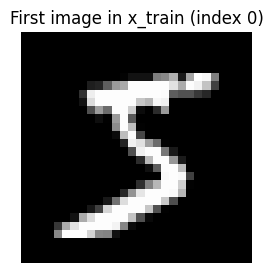

Label of first image (y_train[0]): 5


In [ ]:
# Cell 1: Step 1 - Load and Explore the Dataset
# 1. Load MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 2. Print shapes
print("x_train shape:", x_train.shape)   # expected (60000, 28, 28)
print("y_train shape:", y_train.shape)   # expected (60000,)
print("x_test shape: ", x_test.shape)    # expected (10000, 28, 28)
print("y_test shape: ", y_test.shape)    # expected (10000,)

# 3. Display the first image from x_train
plt.figure(figsize=(3,3))
plt.imshow(x_train[0], cmap='gray')
plt.axis('off')
plt.title("First image in x_train (index 0)")
plt.show()

# 4. Print the label of the first image
print("Label of first image (y_train[0]):", y_train[0])


In [ ]:
# Cell 2: Step 2 - Normalize the Data
# 5. Normalize by dividing by 255 (create normalized copies)
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm  = x_test.astype('float32')  / 255.0

# 6. Print first image's pixel values before and after normalization (showing a small patch)
print("Before normalization (top-left 5x5) - integers 0..255:")
print(x_train[0][:5, :5])

print("\nAfter normalization (top-left 5x5) - floats 0..1:")
print(np.round(x_train_norm[0][:5, :5], 4))


Before normalization (top-left 5x5) - integers 0..255:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

After normalization (top-left 5x5) - floats 0..1:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
# Cell 3: Step 3 - Build the Model
from tensorflow.keras import layers, models

# 7-11. Create Sequential model exactly as requested
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),                 # Step 8
    layers.Dense(128, activation='relu'),                # Step 9
    layers.Dense(64, activation='relu'),                 # Step 10
    layers.Dense(10, activation='softmax')               # Step 11 (output)
])

# 12. Print the model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Cell 4: Step 4 - Compile the Model
# 13. Compile with requested settings
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 14. One-line explanations:
print("optimizer = 'adam' -> algorithm that updates model weights during training (adaptive learning rates).")
print("loss = 'sparse_categorical_crossentropy' -> objective function measuring difference between predicted probs and integer labels.")
print("metrics = ['accuracy'] -> evaluated during training/eval to show proportion of correct predictions.")


optimizer = 'adam' -> algorithm that updates model weights during training (adaptive learning rates).
loss = 'sparse_categorical_crossentropy' -> objective function measuring difference between predicted probs and integer labels.
metrics = ['accuracy'] -> evaluated during training/eval to show proportion of correct predictions.


In [ ]:
# Step 5 (Simpler version): fresh training for 10 epochs
model_10 = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_10.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

history_10 = model_10.fit(x_train_norm, y_train, epochs=10, batch_size=128, validation_split=0.1)

print(f"\nTraining accuracy after last epoch (10 epochs): {history_10.history['accuracy'][-1]:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8295 - loss: 0.6267 - val_accuracy: 0.9593 - val_loss: 0.1424
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9529 - loss: 0.1597 - val_accuracy: 0.9657 - val_loss: 0.1070
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9678 - loss: 0.1081 - val_accuracy: 0.9712 - val_loss: 0.0929
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9770 - loss: 0.0785 - val_accuracy: 0.9727 - val_loss: 0.0871
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9822 - loss: 0.0598 - val_accuracy: 0.9747 - val_loss: 0.0840
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9866 - loss: 0.0466 - val_accuracy: 0.9742 - val_loss: 0.0832
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9904 - loss: 0.0366 - val_accuracy: 0.9745 - val_loss: 0.0844
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9929 - loss: 0.0282 - val_accuracy: 0.

In [ ]:
# Cell 6: Step 6 - Evaluate the Model
# 18. Evaluate on test set
test_loss, test_acc = model.evaluate(x_test_norm, y_test, verbose=2)

# 19. Print test accuracy
print(f"\nTest accuracy: {test_acc:.4f}")

# 20. Compare training accuracy (last logged) and test accuracy
last_train_acc = history_10.history['accuracy'][-1]
print(f"Last training accuracy: {last_train_acc:.4f}")
if last_train_acc > test_acc:
    print("Training accuracy is higher than test accuracy (possible slight overfitting).")
elif last_train_acc < test_acc:
    print("Test accuracy is higher than training accuracy (unusual, maybe random variation).")
else:
    print("Training and test accuracy are equal (rare).")

313/313 - 1s - 2ms/step - accuracy: 0.9690 - loss: 0.1150

Test accuracy: 0.9690
Last training accuracy: 0.9949
Training accuracy is higher than test accuracy (possible slight overfitting).


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Raw predicted probabilities for first test image (index 0):
 [0.     0.     0.     0.     0.     0.     0.     0.9999 0.     0.    ]
Predicted digit: 7
Actual label   : 7


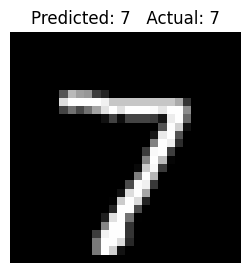

In [ ]:
# Cell 7: Step 7 - Make Predictions
# 21. Get predictions on x_test
preds = model.predict(x_test_norm)   # (10000, 10) probabilities

# 22. Print the raw prediction vector for the first test image
print("Raw predicted probabilities for first test image (index 0):\n", np.round(preds[0], 4))

# 23. Use argmax to find predicted digit
pred_digit = np.argmax(preds[0])

# 24. Print predicted and actual label for the first image
print(f"Predicted digit: {pred_digit}")
print(f"Actual label   : {y_test[0]}")

# 25. Display first test image with predicted digit as title
plt.figure(figsize=(3,3))
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {pred_digit}   Actual: {y_test[0]}")
plt.axis('off')
plt.show()


In [ ]:
# Cell 8: Changes & Experiments (steps 26-29)
def make_model(activation='relu', extra_32=False):
    layers_list = [
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(128, activation=activation),
        layers.Dense(64, activation=activation)
    ]
    if extra_32:
        layers_list.append(layers.Dense(32, activation=activation))  # extra hidden layer (step 26)
    layers_list.append(layers.Dense(10, activation='softmax'))
    return models.Sequential(layers_list)

# --- 26. Add one more hidden layer with 32 neurons and retrain ---
model_extra = make_model(activation='relu', extra_32=True)
model_extra.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_extra = model_extra.fit(x_train_norm, y_train, epochs=5, batch_size=128, validation_split=0.1)
print("Last training acc (extra 32 layer):", hist_extra.history['accuracy'][-1])

# --- 27. Change optimizer to 'sgd' and note accuracy difference ---
model_sgd = make_model(activation='relu', extra_32=True)  # same arch as above for fair compare
model_sgd.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_sgd = model_sgd.fit(x_train_norm, y_train, epochs=5, batch_size=128, validation_split=0.1)
print("Last training acc (optimizer=sgd):", hist_sgd.history['accuracy'][-1])

# --- 28. Train the model with only 1 epoch — what happens to accuracy? ---
model_one = make_model(activation='relu', extra_32=True)
model_one.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_one = model_one.fit(x_train_norm, y_train, epochs=1, batch_size=128, validation_split=0.1)
print("Training acc after 1 epoch:", hist_one.history['accuracy'][-1])

# --- 29. Change activation 'relu' -> 'tanh' and retrain ---
model_tanh = make_model(activation='tanh', extra_32=True)
model_tanh.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_tanh = model_tanh.fit(x_train_norm, y_train, epochs=5, batch_size=128, validation_split=0.1)
print("Last training acc (activation=tanh):", hist_tanh.history['accuracy'][-1])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7922 - loss: 0.7295 - val_accuracy: 0.9583 - val_loss: 0.1371
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9539 - loss: 0.1543 - val_accuracy: 0.9663 - val_loss: 0.1071
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9695 - loss: 0.1011 - val_accuracy: 0.9730 - val_loss: 0.0928
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9776 - loss: 0.0746 - val_accuracy: 0.9763 - val_loss: 0.0868
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9827 - loss: 0.0578 - val_accuracy: 0.9748 - val_loss: 0.0886
Last training acc (extra 32 layer): 0.9831851720809937
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3577 - loss: 2.0216 - val_accuracy: 0.8122 - val_loss: 0.8574
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8102 - loss: 0.7562 - val_accuracy: 0.8963 - val_loss: 0.4023
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc

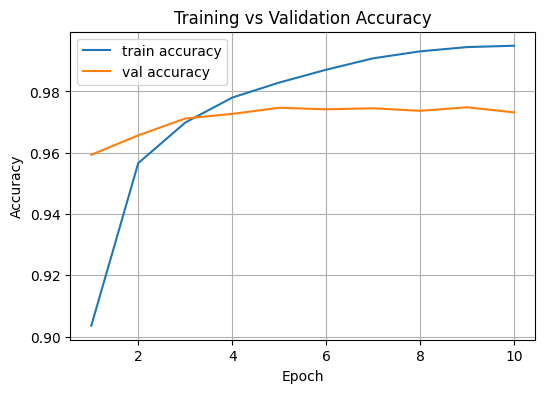

In [ ]:
# Cell 9: Step 30 - Plot training accuracy vs epoch for any history object
# Example: plot the 5-epoch history from the original model (history_5) and continued to 10 (history_10_continued)
# We'll plot the combined 'history_10_continued' if available; otherwise plot history_5

# If you used continued training above:
# acc = history_10_continued['accuracy']
# val_acc = history_10_continued['val_accuracy']

# Use the history from the 10-epoch fresh training
acc = history_10.history['accuracy']
val_acc = history_10.history['val_accuracy']


plt.figure(figsize=(6,4))
plt.plot(range(1, len(acc)+1), acc, label='train accuracy')
plt.plot(range(1, len(val_acc)+1), val_acc, label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# You can also plot other experiment histories similarly, e.g.:
# plt.plot(hist_extra.history['accuracy'], label='extra_32_train')
# plt.plot(hist_sgd.history['accuracy'], label='sgd_train')
# plt.legend()